### import all the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

### Pass the warnings:

In [2]:
import warnings
warnings.filterwarnings('ignore')


### Read the dataset and store it into pandas dataframe:

In [3]:
df = pd.read_csv(r'C:\Users\宋知恒\Desktop\Accident_Information.csv', low_memory=False)

# 检查数据是否加载成功
print(df.head())  # 查看前几行
print(df.shape)   # 查看数据维度

  Accident_Index 1st_Road_Class  1st_Road_Number 2nd_Road_Class  \
0  200501BS00001              A           3218.0            NaN   
1  200501BS00002              B            450.0              C   
2  200501BS00003              C              0.0            NaN   
3  200501BS00004              A           3220.0            NaN   
4  200501BS00005   Unclassified              0.0            NaN   

   2nd_Road_Number Accident_Severity Carriageway_Hazards        Date  \
0              0.0           Serious                 NaN  2005-01-04   
1              0.0            Slight                 NaN  2005-01-05   
2              0.0            Slight                 NaN  2005-01-06   
3              0.0            Slight                 NaN  2005-01-07   
4              0.0            Slight                 NaN  2005-01-10   

  Day_of_Week  Did_Police_Officer_Attend_Scene_of_Accident  ...  \
0     Tuesday                                          1.0  ...   
1   Wednesday                 

# Exploratory Data Analysis:

### Displayt the shape of the dataset:

In [4]:
df.shape

(2047256, 34)

### Display the data types of all columns in the data frame:

In [5]:
df.dtypes

Accident_Index                                  object
1st_Road_Class                                  object
1st_Road_Number                                float64
2nd_Road_Class                                  object
2nd_Road_Number                                float64
Accident_Severity                               object
Carriageway_Hazards                             object
Date                                            object
Day_of_Week                                     object
Did_Police_Officer_Attend_Scene_of_Accident    float64
Junction_Control                                object
Junction_Detail                                 object
Latitude                                       float64
Light_Conditions                                object
Local_Authority_(District)                      object
Local_Authority_(Highway)                       object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude 

### Display the column names in the data frame:

In [6]:
df.columns

Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland'],
      dtype='object')

### display the general information about the dataset:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047256 entries, 0 to 2047255
Data columns (total 34 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Accident_Index                               object 
 1   1st_Road_Class                               object 
 2   1st_Road_Number                              float64
 3   2nd_Road_Class                               object 
 4   2nd_Road_Number                              float64
 5   Accident_Severity                            object 
 6   Carriageway_Hazards                          object 
 7   Date                                         object 
 8   Day_of_Week                                  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  float64
 10  Junction_Control                             object 
 11  Junction_Detail                              object 
 12  Latitude                                     float64
 13  Light_Condit

### Print the first 10 rows of the dataset:

In [8]:
df.head(10)

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,NaN,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,NaN,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,NaN,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,NaN,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,NaN,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,NaN,2005-01-10,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30.0,21:13,Urban,Fine no high winds,2005,No
5,200501BS00006,Unclassified,0.0,NaN,0.0,Slight,NaN,2005-01-11,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,Oil or diesel,30.0,12:40,Urban,Raining no high winds,2005,No
6,200501BS00007,C,0.0,Unclassified,0.0,Slight,NaN,2005-01-13,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,20:40,Urban,Fine no high winds,2005,No
7,200501BS00009,A,315.0,NaN,0.0,Slight,NaN,2005-01-14,Friday,1.0,...,Metropolitan Police,Dry,Dual carriageway,NaN,30.0,17:35,Urban,Fine no high winds,2005,No
8,200501BS00010,A,3212.0,B,304.0,Slight,NaN,2005-01-15,Saturday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,22:43,Urban,Fine no high winds,2005,No
9,200501BS00011,B,450.0,C,0.0,Slight,NaN,2005-01-15,Saturday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,16:00,Urban,Fine no high winds,2005,No


### Convert date into pandas datetime object:

In [9]:
df['Date'] = pd.to_datetime(df['Date'],)

### Extract day, month and week some useful features from 'date' column:

In [10]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week

### accident_severity is out target variable, display the unique values in accident_severity column:

### 1 = Satal, 2= Serious and 3 = Slight

In [11]:
df['Accident_Severity'].unique()

array(['Serious', 'Slight', 'Fatal'], dtype=object)

### display the value count for the accident_severity (target) variable:

In [12]:
df['Accident_Severity'].value_counts()

Accident_Severity
Slight     1734548
Serious     286339
Fatal        26369
Name: count, dtype: int64

# Univariate Analysis:

### Distribution of original data by target (accident_severity):

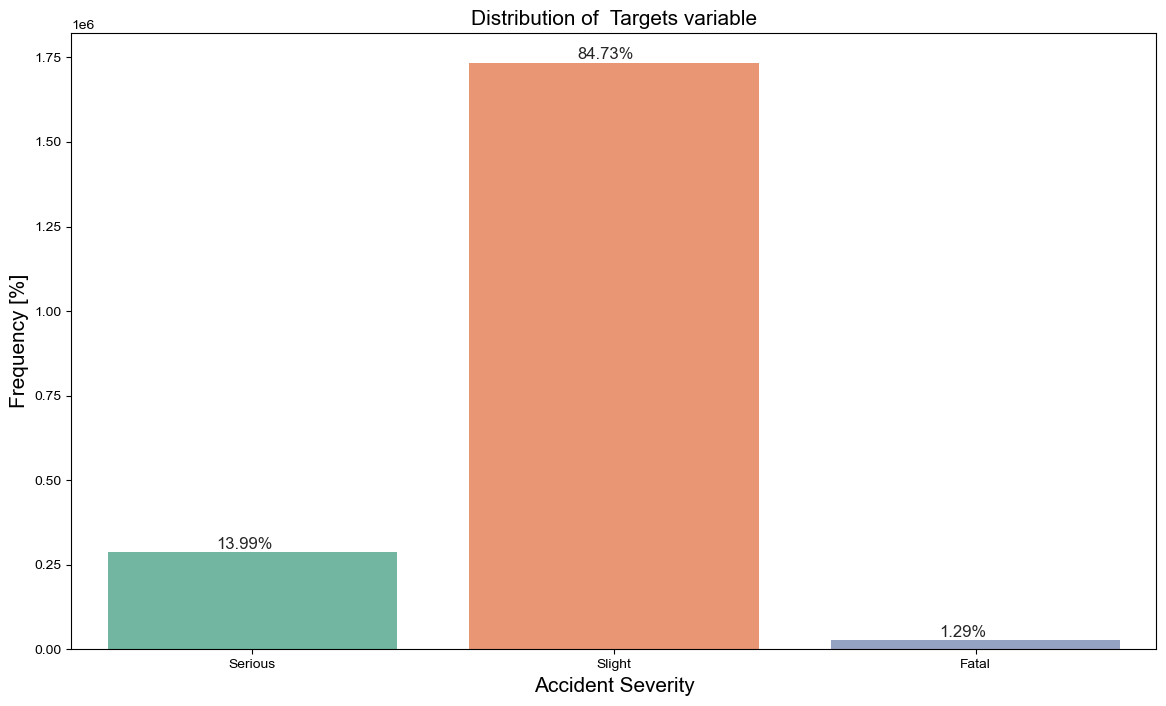

In [13]:
ax = sns.countplot(x = df.Accident_Severity ,palette="Set2")
sns.set(font_scale=1)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(14,8)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(df.Accident_Severity)), (p.get_x()+ 0.3, p.get_height()+10000))

plt.title('Distribution of  Targets variable',fontsize = 15)
plt.xlabel('Accident Severity',fontsize = 15)
plt.ylabel('Frequency [%]',fontsize = 15)
plt.show()

### Number of casualties distribution

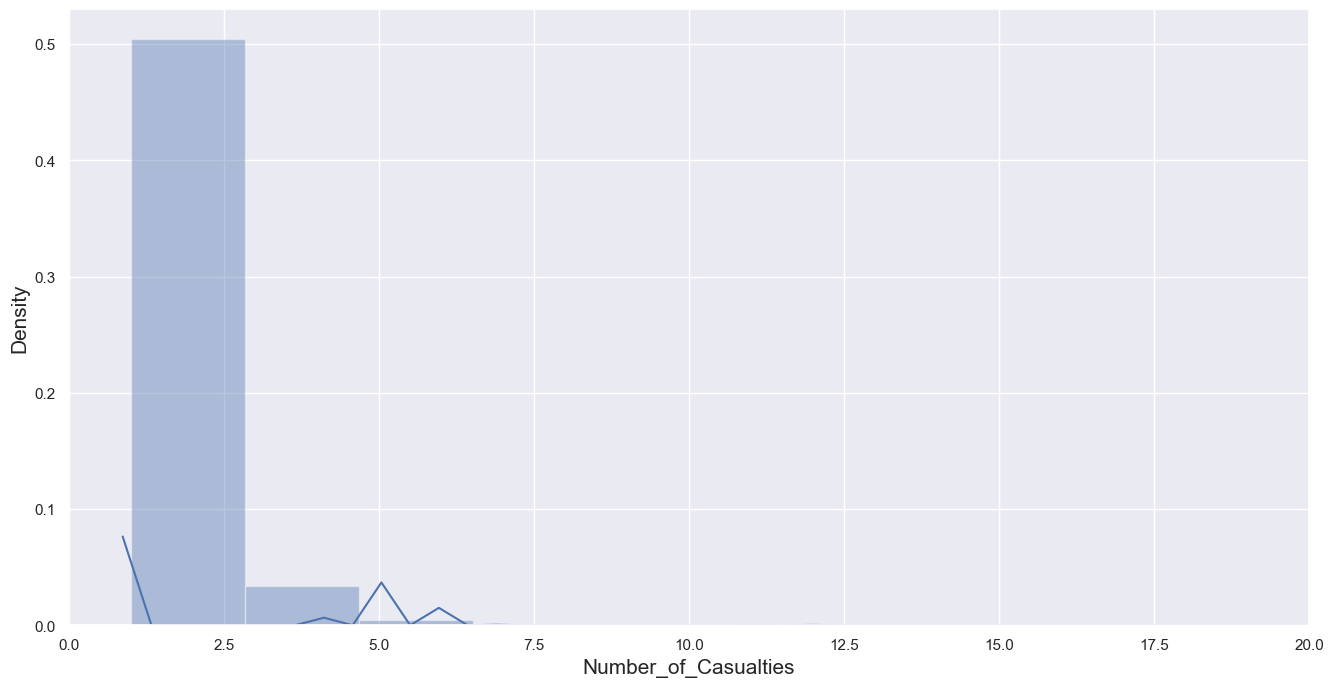

Min: 1 
Max: 93 
Median: 1.0


In [14]:
plt.figure(figsize=(16,8))
sns.distplot(df.Number_of_Casualties).set_xlim(0,20)
plt.xlabel('Number_of_Casualties' ,fontsize = 15)
plt.ylabel('Density',fontsize = 15)
plt.show()
print('Min:',    df.Number_of_Casualties.min(), '\n'
      'Max:',    df.Number_of_Casualties.max(), '\n'
      'Median:', df.Number_of_Casualties.median())

### Distribution of accidents over the day

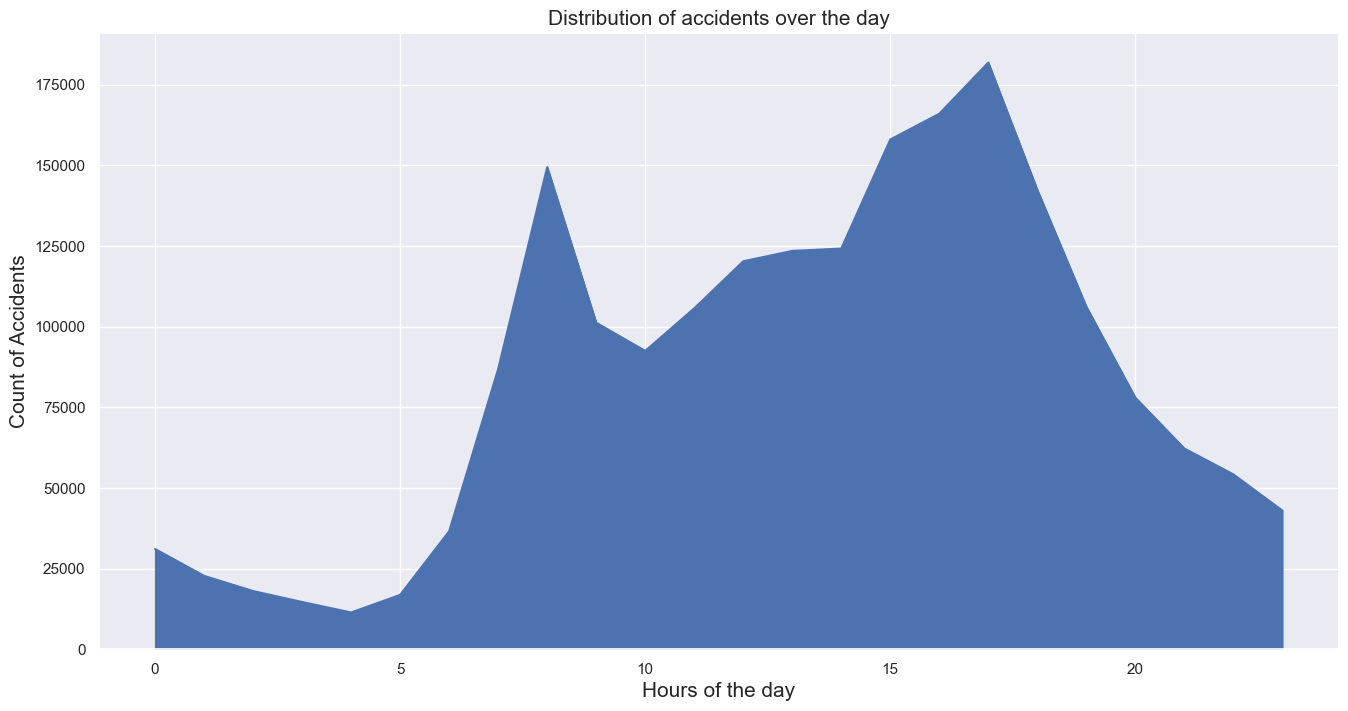

In [15]:
time_x = pd.to_datetime(df['Time'], format='%H:%M').dt.hour
plt.figure(figsize=(16,8))
ax = time_x.value_counts().sort_index().plot(kind = 'area')
ax.set_xlabel('Hours of the day', fontsize = 15)
ax.set_ylabel('Count of Accidents', fontsize = 15)
ax.set_title('Distribution of accidents over the day', fontsize = 15)
plt.show()

### Number of vehicles distribution

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

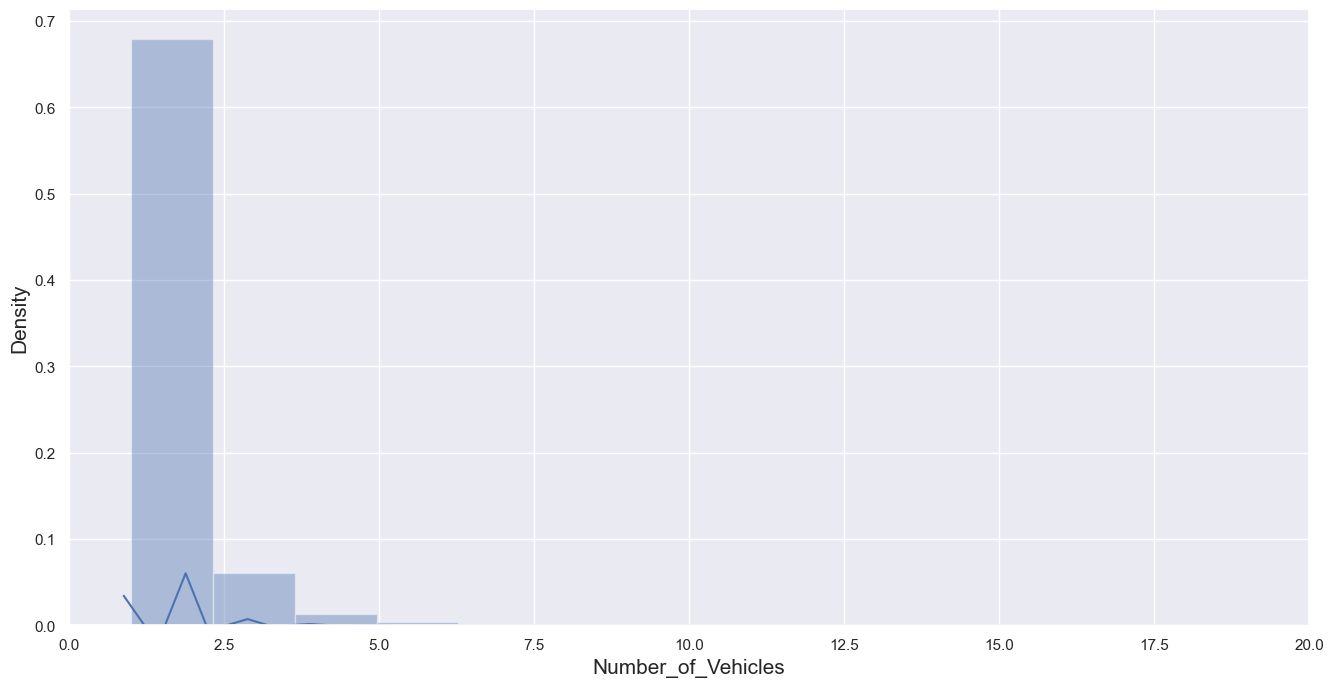

Min: 1 
Max: 67 
Median: 2.0


In [17]:
plt.figure(figsize=(16,8))
sns.distplot(df.Number_of_Vehicles).set_xlim(0,20)
plt.xlabel('Number_of_Vehicles',fontsize = 15)
plt.ylabel('Density',fontsize = 15)
plt.show()
print('Min:',    df.Number_of_Vehicles.min(), '\n'
      'Max:',    df.Number_of_Vehicles.max(), '\n'
      'Median:', df.Number_of_Vehicles.median())

### A boxplot to show Distribution of Speed Limit:

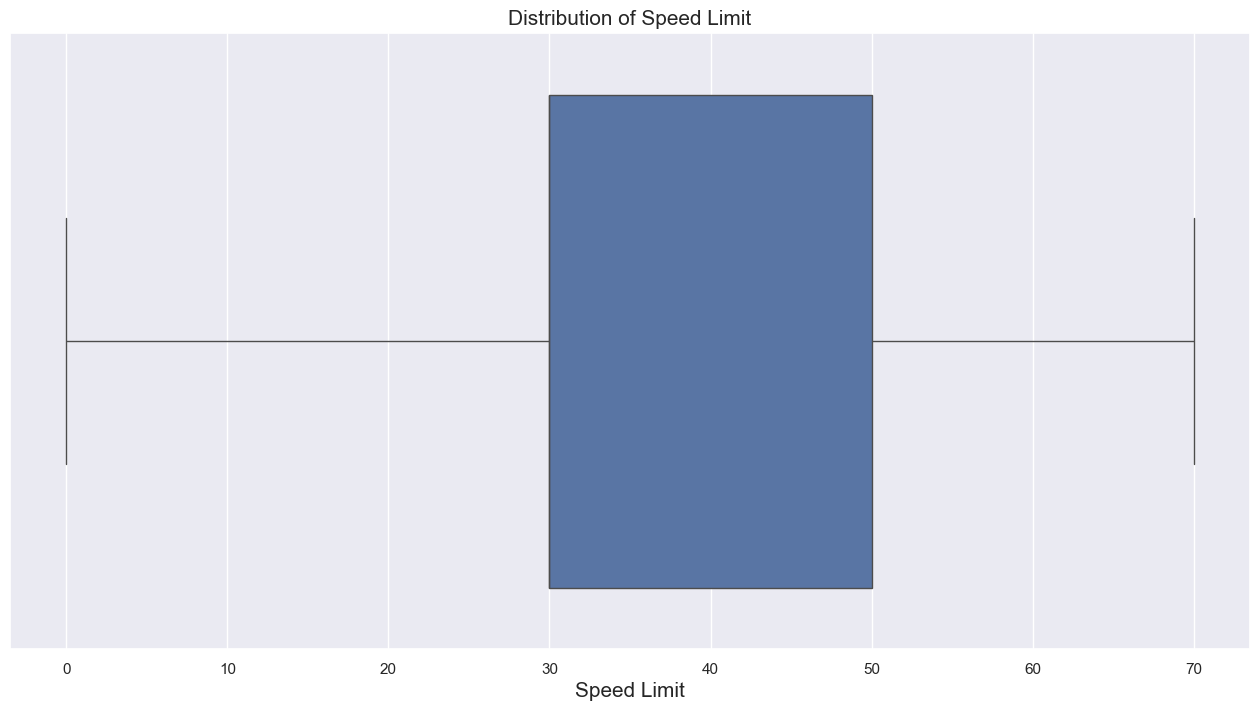

In [18]:
import seaborn as sns
plt.figure(figsize = (16, 8))
sns.boxplot(x=df["Speed_limit"])
plt.title("Distribution of Speed Limit",fontsize = 15)
plt.xlabel("Speed Limit",fontsize = 15)
plt.show()


### Bar chart of "day_of_week"

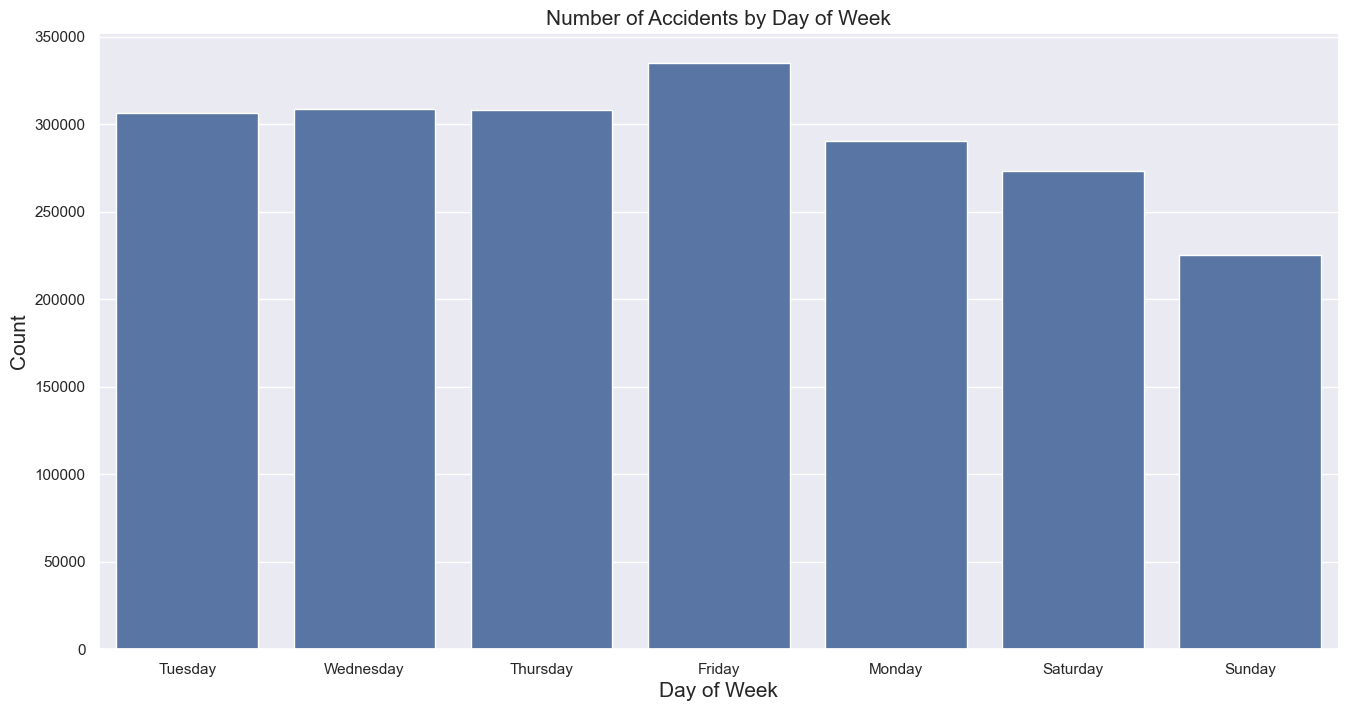

In [19]:
plt.figure(figsize = (16, 8))
sns.countplot(x=df["Day_of_Week"])
plt.title("Number of Accidents by Day of Week",fontsize = 15)
plt.xlabel("Day of Week",fontsize = 15)
plt.ylabel("Count",fontsize = 15)
plt.show()

# Multivariate Analysis:

### Scatter plot of "speed_limit" vs "number_of_casualties"

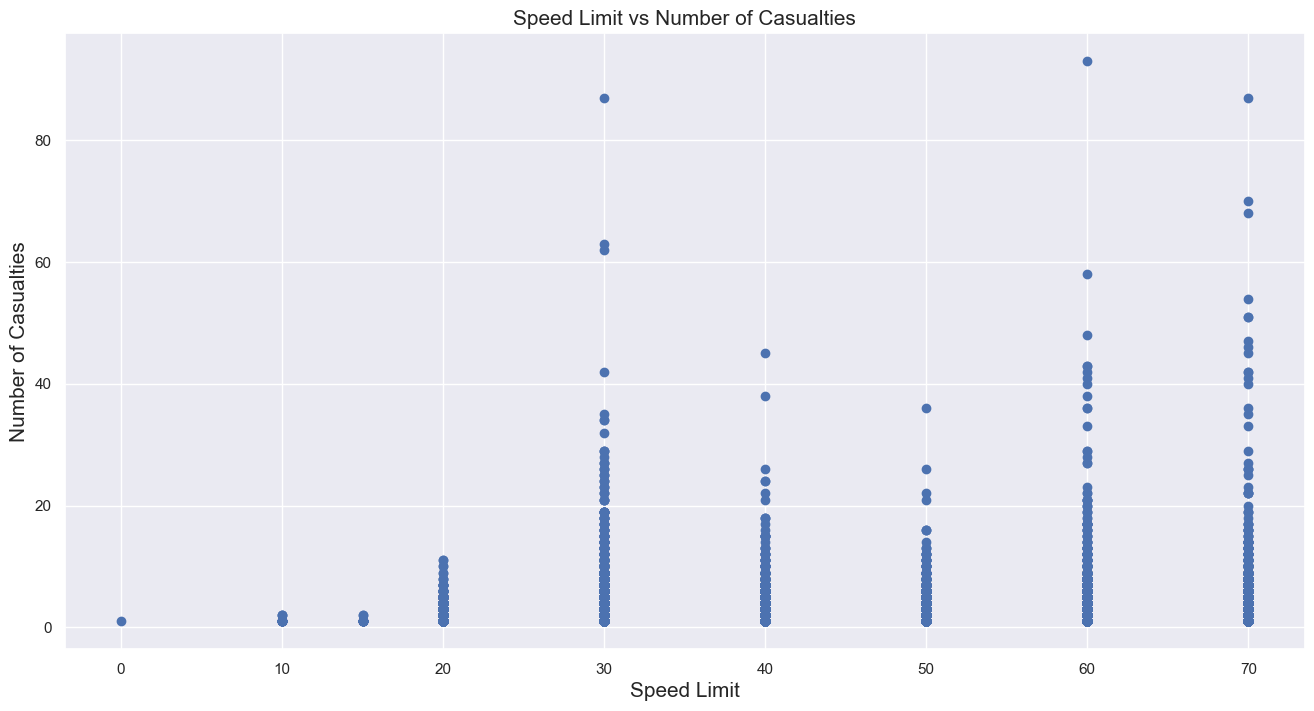

In [20]:
plt.figure(figsize = (16, 8))
plt.scatter(x=df["Speed_limit"], y=df["Number_of_Casualties"])
plt.title("Speed Limit vs Number of Casualties",fontsize = 15)
plt.xlabel("Speed Limit",fontsize = 15)
plt.ylabel("Number of Casualties",fontsize = 15)
plt.show()


### Box plot of "speed_limit" by "weather_conditions"

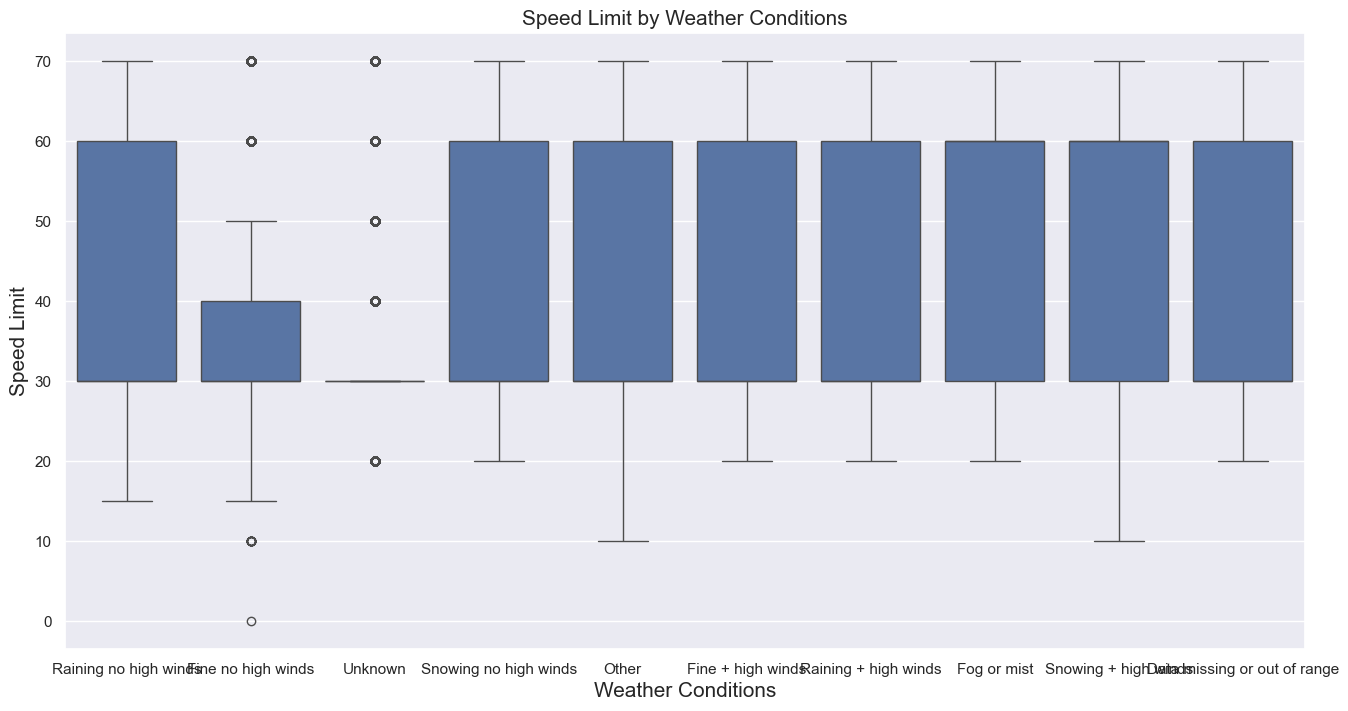

In [21]:
plt.figure(figsize = (16, 8))
sns.boxplot(x=df["Weather_Conditions"], y=df["Speed_limit"])
plt.title("Speed Limit by Weather Conditions",fontsize = 15)
plt.xlabel("Weather Conditions",fontsize = 15)
plt.ylabel("Speed Limit",fontsize = 15)
plt.show()


### Drop the unnecessary columns:

In [22]:
df.drop(['Accident_Index', 'Local_Authority_(Highway)','Time', 'Date', 'LSOA_of_Accident_Location','Year'], axis = 1, inplace = True)

### Check are there any missing values in the data frame:

In [23]:
df.isnull().any()

1st_Road_Class                                 False
1st_Road_Number                                 True
2nd_Road_Class                                  True
2nd_Road_Number                                 True
Accident_Severity                              False
Carriageway_Hazards                             True
Day_of_Week                                    False
Did_Police_Officer_Attend_Scene_of_Accident     True
Junction_Control                               False
Junction_Detail                                False
Latitude                                        True
Light_Conditions                               False
Local_Authority_(District)                     False
Location_Easting_OSGR                           True
Location_Northing_OSGR                          True
Longitude                                       True
Number_of_Casualties                           False
Number_of_Vehicles                             False
Pedestrian_Crossing-Human_Control             

### Count the number of missing values in each column of the data frame:

In [24]:
df.isnull().sum()

1st_Road_Class                                       0
1st_Road_Number                                      2
2nd_Road_Class                                  844272
2nd_Road_Number                                  17593
Accident_Severity                                    0
Carriageway_Hazards                            2007807
Day_of_Week                                          0
Did_Police_Officer_Attend_Scene_of_Accident        278
Junction_Control                                     0
Junction_Detail                                      0
Latitude                                           174
Light_Conditions                                     0
Local_Authority_(District)                           0
Location_Easting_OSGR                              164
Location_Northing_OSGR                             164
Longitude                                          175
Number_of_Casualties                                 0
Number_of_Vehicles                                   0
Pedestrian

### Fill the missing values in location_easting_osgr, location_northing_osgr, longitude and latitude columns:

In [25]:
df['Location_Easting_OSGR'] = df['Location_Easting_OSGR'].fillna(df['Location_Easting_OSGR'].mean())
df['Location_Northing_OSGR'] = df['Location_Northing_OSGR'].fillna(df['Location_Northing_OSGR'].mean())
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].mode()[0])
df['Latitude'] = df['Latitude'].fillna(df['Latitude'].mode()[0])

### Convert (1 = Satal, 2= Serious and 3 = Slight) to binary values (0 = Slight, 1 =  Serious): 
### Now we have binary classification problem

In [26]:
df['Accident_Severity'] = df['Accident_Severity'].replace([2 , 1], 0)
df['Accident_Severity'] = df['Accident_Severity'].replace(3, 1)

### Value counts of the accident_severity again:

In [27]:
df['Accident_Severity'].value_counts()

Accident_Severity
Slight     1734548
Serious     286339
Fatal        26369
Name: count, dtype: int64

### Distribution of original data by targets


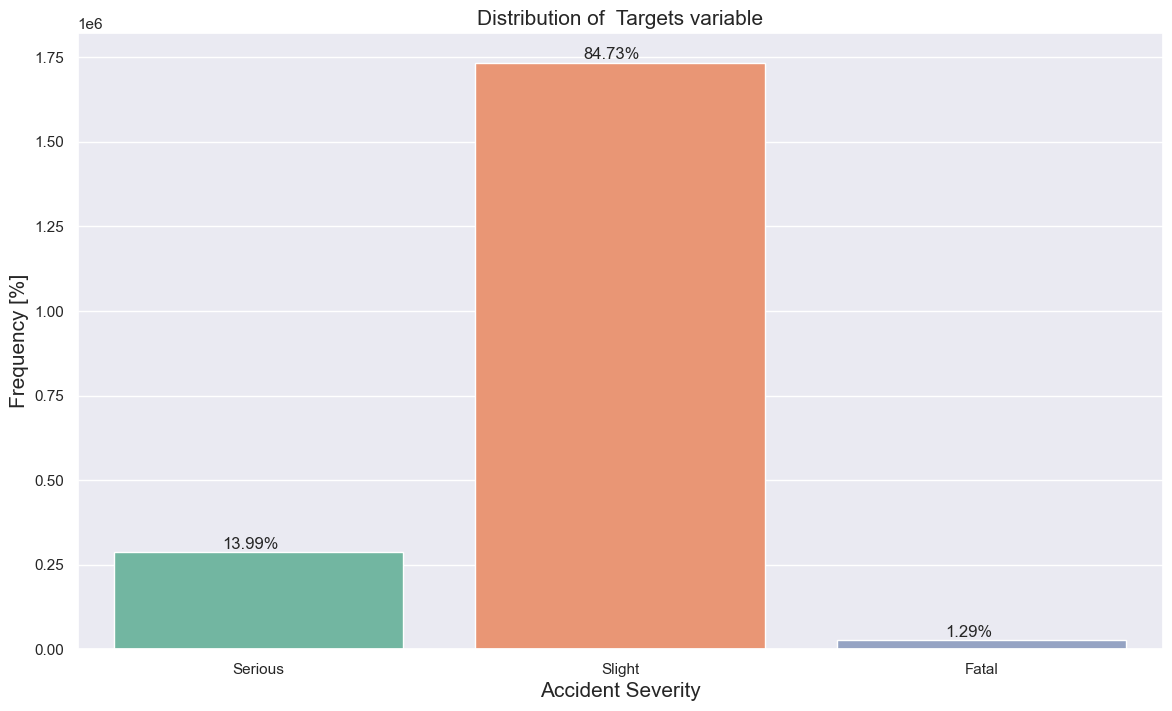

In [28]:

ax = sns.countplot(x = df.Accident_Severity ,palette="Set2")
sns.set(font_scale=1)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(14,8)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(df.Accident_Severity)), (p.get_x()+ 0.3, p.get_height()+10000))

plt.title('Distribution of  Targets variable',fontsize = 15)
plt.xlabel('Accident Severity',fontsize = 15)
plt.ylabel('Frequency [%]',fontsize = 15)
plt.show()

### Store features into feature matrix X and target into vector y:

In [29]:
# Features
X = df.loc[:,df.columns != 'Accident_Severity']
#Target
y = df['Accident_Severity']

## Feature Selection using SelectKbest method:

### import SelectKBest and f_classif from sklear for feature seletion:

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

### Initialized SelectKBest with f_classif test and k= 15

In [31]:
test = SelectKBest(score_func=f_classif, k=15)

### Fit the SelectKBest  model:

In [32]:
# 检查 X 和 y 中的缺失值
print("X 中的总缺失值数量:", X.isnull().sum().sum())
print("y 中的缺失值数量:", y.isnull().sum())

# 查看哪些列有缺失值
print("各列缺失值情况:")
missing_cols = X.columns[X.isnull().any()].tolist()
print(X[missing_cols].isnull().sum())

# 如果还有缺失值，显示具体列
if len(missing_cols) > 0:
    print("包含缺失值的列:", missing_cols)

X 中的总缺失值数量: 4871659
y 中的缺失值数量: 0
各列缺失值情况:
1st_Road_Number                                      2
2nd_Road_Class                                  844272
2nd_Road_Number                                  17593
Carriageway_Hazards                            2007807
Did_Police_Officer_Attend_Scene_of_Accident        278
Pedestrian_Crossing-Human_Control                 2920
Pedestrian_Crossing-Physical_Facilities           3560
Special_Conditions_at_Site                     1995137
Speed_limit                                         37
InScotland                                          53
dtype: int64
包含缺失值的列: ['1st_Road_Number', '2nd_Road_Class', '2nd_Road_Number', 'Carriageway_Hazards', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Special_Conditions_at_Site', 'Speed_limit', 'InScotland']


In [33]:
# 处理缺失值 - 根据列的特性分别处理
print("处理前缺失值统计:")
print(X.isnull().sum())

# 对于数值型列，用中位数填充
numeric_cols = ['1st_Road_Number', '2nd_Road_Number', 'Speed_limit']
for col in numeric_cols:
    if col in X.columns:
        X[col] = X[col].fillna(X[col].median())

# 对于分类列，用众数填充
categorical_cols = ['2nd_Road_Class', 'Carriageway_Hazards', 'Did_Police_Officer_Attend_Scene_of_Accident', 
                   'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 
                   'Special_Conditions_at_Site', 'InScotland']

for col in categorical_cols:
    if col in X.columns:
        # 如果众数不存在，使用 -1 或其他标识值
        if len(X[col].mode()) > 0:
            X[col] = X[col].fillna(X[col].mode()[0])
        else:
            X[col] = X[col].fillna(-1)  # 或者用其他合适的值

print("\n处理后缺失值统计:")
print(X.isnull().sum())
print("总缺失值数量:", X.isnull().sum().sum())

处理前缺失值统计:
1st_Road_Class                                       0
1st_Road_Number                                      2
2nd_Road_Class                                  844272
2nd_Road_Number                                  17593
Carriageway_Hazards                            2007807
Day_of_Week                                          0
Did_Police_Officer_Attend_Scene_of_Accident        278
Junction_Control                                     0
Junction_Detail                                      0
Latitude                                             0
Light_Conditions                                     0
Local_Authority_(District)                           0
Location_Easting_OSGR                                0
Location_Northing_OSGR                               0
Longitude                                            0
Number_of_Casualties                                 0
Number_of_Vehicles                                   0
Pedestrian_Crossing-Human_Control                 2920


In [34]:
# 特征矩阵和目标变量
X = df.loc[:,df.columns != 'Accident_Severity']
y = df['Accident_Severity']

# 1. 处理缺失值
print("步骤1: 处理缺失值")
print("处理前缺失值:", X.isnull().sum().sum())

# 填充缺失值
for col in X.columns:
    if X[col].isnull().sum() > 0:
        if X[col].dtype in ['int64', 'float64']:
            X[col] = X[col].fillna(X[col].median())
        else:
            X[col] = X[col].fillna('Unknown')

print("处理后缺失值:", X.isnull().sum().sum())

# 2. 检查并转换非数值列
print("\n步骤2: 检查数据类型")
non_numeric_cols = X.select_dtypes(include=['object']).columns
print("非数值列:", non_numeric_cols.tolist())

# 如果有非数值列，进行编码
if len(non_numeric_cols) > 0:
    from sklearn.preprocessing import LabelEncoder
    
    for col in non_numeric_cols:
        print(f"编码列: {col}")
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
    
    print("编码完成")

# 3. 确保所有数据都是数值型
print("\n步骤3: 最终数据类型检查")
print(X.dtypes)
print("最终缺失值检查:", X.isnull().sum().sum())

# 4. 现在进行特征选择
print("\n步骤4: 开始特征选择")
test = SelectKBest(score_func=f_classif, k=15)
fit = test.fit(X, y)
print("特征选择完成!")

步骤1: 处理缺失值
处理前缺失值: 4871659
处理后缺失值: 0

步骤2: 检查数据类型
非数值列: ['1st_Road_Class', '2nd_Road_Class', 'Carriageway_Hazards', 'Day_of_Week', 'Junction_Control', 'Junction_Detail', 'Light_Conditions', 'Local_Authority_(District)', 'Police_Force', 'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site', 'Urban_or_Rural_Area', 'Weather_Conditions', 'InScotland']
编码列: 1st_Road_Class
编码列: 2nd_Road_Class
编码列: Carriageway_Hazards
编码列: Day_of_Week
编码列: Junction_Control
编码列: Junction_Detail
编码列: Light_Conditions
编码列: Local_Authority_(District)
编码列: Police_Force
编码列: Road_Surface_Conditions
编码列: Road_Type
编码列: Special_Conditions_at_Site
编码列: Urban_or_Rural_Area
编码列: Weather_Conditions
编码列: InScotland
编码完成

步骤3: 最终数据类型检查
1st_Road_Class                                   int32
1st_Road_Number                                float64
2nd_Road_Class                                   int32
2nd_Road_Number                                float64
Carriageway_Hazards                              int32
Da

In [35]:
fit = test.fit(X, y)

### Transform the features:

In [36]:
filtered_features= fit.transform(X)

### Show the supporting variables given by SelectKBest (True/false):

In [37]:
test.get_support()

array([ True, False,  True,  True, False, False,  True, False,  True,
        True,  True, False, False,  True, False,  True,  True, False,
       False, False, False,  True, False,  True,  True,  True,  True,
       False, False, False])

### Display the scores of the features assigned by the SelectkBest:

In [38]:
test.scores_

array([9.83169933e+02, 2.64129884e+01, 4.41442982e+03, 6.37820532e+02,
       5.93287627e-01, 9.42991052e+01, 1.29256539e+04, 1.66024701e+02,
       6.93129899e+02, 1.07890689e+03, 1.30868228e+03, 1.41825265e+00,
       3.90801743e+02, 1.08090865e+03, 4.03384708e+02, 8.12638942e+03,
       6.98681165e+03, 3.12242905e+01, 1.55058647e+02, 4.53553194e+01,
       1.08587423e+02, 7.36826352e+02, 3.50558202e+01, 8.64466258e+03,
       8.33975164e+03, 8.75561035e+02, 8.12763289e+02, 1.97746061e+00,
       1.67280007e+01, 1.61563095e+01])

### Find the Feature importance for each feature:

In [39]:
feat_importances = pd.Series(test.scores_, index=X.columns)

### Display the feature importance using a bar chart

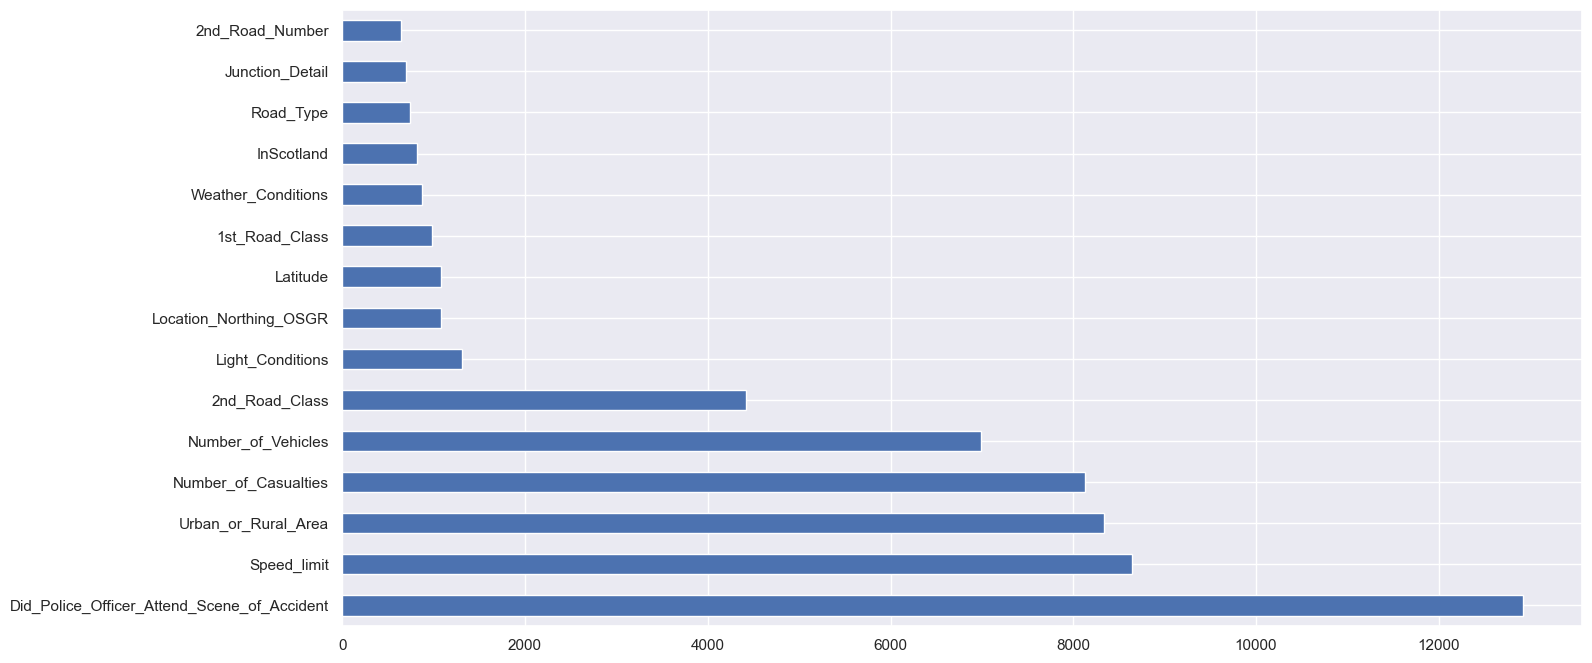

In [40]:
feat_importances.nlargest(15).plot(kind='barh',figsize = (16,8))
plt.show()

### Getting the column names:

In [41]:
column_names = X.columns[test.get_support()]
column_names

Index(['1st_Road_Class', '2nd_Road_Class', '2nd_Road_Number',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Junction_Detail',
       'Latitude', 'Light_Conditions', 'Location_Northing_OSGR',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Type',
       'Speed_limit', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'InScotland'],
      dtype='object')

### Selecting the  relevant columns given by SelectKbest only: 

In [42]:
X_Selectkbest = X[column_names]
X_Selectkbest.head()

,1st_Road_Class,2nd_Road_Class,2nd_Road_Number,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Detail,Latitude,Light_Conditions,Location_Northing_OSGR,Number_of_Casualties,Number_of_Vehicles,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,InScotland
0,0,6,0.0,1.0,4,51.489096,5,178240.0,1,1,4,30.0,2,6,0
1,2,3,0.0,1.0,0,51.520075,1,181650.0,1,1,1,30.0,2,2,0
2,3,6,0.0,1.0,4,51.525301,1,182240.0,1,2,4,30.0,2,2,0
3,0,6,0.0,1.0,4,51.482442,5,177530.0,1,1,4,30.0,2,2,0
4,5,6,0.0,1.0,4,51.495752,0,179040.0,1,1,4,30.0,2,2,0


### Divide the data set into training and Testing sets (training set 80%, Testing set 20%):

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Selectkbest, y, test_size=0.20, random_state=0)  

### Use StandardScaler to scale the values of the dataset:

In [44]:
SC = StandardScaler()
X_train_scaled = SC.fit_transform(X_train)
X_test_scaled = SC.fit_transform(X_test)

# 	Experimental Design:

### Logistic Regression Model

# Initialize the LogisticRegression Model
Lg_classifier = LogisticRegression()
# Train the model on training set
Lg_classifier.fit(X_train_scaled, y_train)

In [45]:
Lg_classifier = LogisticRegression()
Lg_classifier.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Make prediction and evaluation on seen data:

In [46]:
# Make prediction on seen data
y_pred = Lg_classifier.predict(X_train_scaled)
#he Accuracy score for Logistic Regresson on seen data :
Lg_score_seen = accuracy_score(y_train, y_pred)
print('The Accuracy score for Logistic Regresson on seen data : ', Lg_score_seen)

The Accuracy score for Logistic Regresson on seen data :  0.8470519060888849


### Make prediction and evaluation on unseen data:

In [47]:
# Make prediction on unseen data
y_pred = Lg_classifier.predict(X_test_scaled)
#he Accuracy score for Logistic Regresson on unseen data :
Lg_score_unseen = accuracy_score(y_test, y_pred)
print('The Accuracy score for Logistic Regresson on unseen data : ', Lg_score_unseen)


The Accuracy score for Logistic Regresson on unseen data :  0.8478747203579419


### Decision Tree Classifier Model

In [48]:
#Initialize the DecisionTreeClassifier Model
Dt_classifier = DecisionTreeClassifier()
# Train the model on training set
Dt_classifier.fit(X_train_scaled, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Make prediction and evaluation on seen data:

In [49]:
# Make prediction on seen data
y_pred = Dt_classifier.predict(X_train_scaled)
#he Accuracy score for decision tree on seen data :
Dt_score_seen = accuracy_score(y_train, y_pred)
print('The Accuracy score for decision tree on seen data : ', Dt_score_seen)

The Accuracy score for decision tree on seen data :  0.9972035725886614


### Make prediction and evaluation on unseen data:

In [50]:
# Make prediction on unseen data
y_pred = Dt_classifier.predict(X_test_scaled)
#he Accuracy score for decision tree on unseen data :
Dt_score_unseen = accuracy_score(y_test, y_pred)
print('The Accuracy score for decision tree on unseen data : ', Dt_score_unseen)


The Accuracy score for decision tree on unseen data :  0.7436207418696209


### RandomForest Classifier Model

In [51]:
#Initialize the RandomForestClassifier Model
Rf_Classifier = RandomForestClassifier(n_estimators = 100, )
# Train the model on training set
Rf_Classifier.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Make prediction and evaluation on seen data:

In [52]:
# Make prediction on seen data
y_pred = Rf_Classifier.predict(X_train_scaled)
#he Accuracy score for Random Forest on seen data :
Rf_score_seen = accuracy_score(y_train, y_pred)
print('The Accuracy score for Random Forest on seen data : ', Rf_score_seen)

The Accuracy score for Random Forest on seen data :  0.9971241980114837


### Make prediction and evaluation on unseen data:

In [53]:
# Make prediction on unseen data
y_pred = Rf_Classifier.predict(X_test_scaled)
#he Accuracy score for Random Forest on unseen data :
Rf_score_unseen = accuracy_score(y_test, y_pred)
print('The Accuracy score for Random Forest on unseen data : ', Rf_score_unseen)


The Accuracy score for Random Forest on unseen data :  0.8075696296513388


### Gradient Boosting Classifier Model

In [54]:
#Initialize the GradientBoostingClassifier Model
Gb_Classifier = GradientBoostingClassifier()
# Train the model on training set
Gb_Classifier.fit(X_train_scaled, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


### Make prediction and evaluation on seen data:

In [55]:
# Make prediction on seen data
y_pred = Gb_Classifier.predict(X_train_scaled)
#he Accuracy score for Gradient Boosting on seen data :
Gb_score_seen = accuracy_score(y_train, y_pred)
print('The Accuracy score for Gradient Boosting on seen data : ', Gb_score_seen)

The Accuracy score for Gradient Boosting on seen data :  0.8472454579424644


### Make prediction and evaluation on unseen data:

In [56]:
# Make prediction on unseen data
y_pred = Gb_Classifier.predict(X_test_scaled)
#he Accuracy score for  Gradient Boosting on unseen data :
Gb_score_unseen = accuracy_score(y_test, y_pred)
print('The Accuracy score for  Gradient Boosting on unseen data : ', Gb_score_unseen)


The Accuracy score for  Gradient Boosting on unseen data :  0.8479870656389515


### XGB Classifier Model

In [57]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# 初始化标签编码器
label_encoder = LabelEncoder()

# 对 y_train 和 y_test 进行编码（注意：y_test 也要用同一个 encoder）
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)  # 如果你后面要评估模型

# 初始化模型
xgb_classifier = XGBClassifier()

# 训练模型
xgb_classifier.fit(X_train_scaled, y_train_encoded)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [58]:
#Initialize the XGBClassifier Model
XGB_Classifier = XGBClassifier()
# Train the model on training set
XGB_Classifier.fit(X_train_scaled, y_train_encoded)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


### Make prediction and evaluation on seen data:

In [59]:
# Make prediction on seen data
y_pred = XGB_Classifier.predict(X_train_scaled)
#he Accuracy score for XGB_Classifier on seen data :
XGB_score_seen = accuracy_score(y_train, y_pred)
print('The Accuracy score for XGB_Classifier on seen data : ', XGB_score_seen)

The Accuracy score for XGB_Classifier on seen data :  0.0


### Make prediction and evaluation on unseen data:

In [60]:
# Make prediction on unseen data
y_pred = XGB_Classifier.predict(X_test_scaled)
#he Accuracy score for  XGB_Classifier on unseen data :
XGB_score_unseen = accuracy_score(y_test, y_pred)
print('The Accuracy score for XGB_Classifier on unseen data : ', XGB_score_unseen)


The Accuracy score for XGB_Classifier on unseen data :  0.0


### KNeighbors Classifier Model

In [61]:
#Initialize the KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier()
# Train the model on KNeighborsClassifier set
KNN_Classifier.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### Make prediction and evaluation on seen data:

In [62]:
try:
# Make prediction on seen data
y_pred = KNN_Classifier.predict(X_train_scaled)
#he Accuracy score for KNN classifier on seen data :
KNN_score_seen = accuracy_score(y_train, y_pred)
print('The Accuracy score for KNN_Classifier on seen data : ', KNN_score_seen)
except Exception as e:
    print("[Warning] KNN model failed:", e)
    KNN_score_unseen = None  # 设置为 None，后面可跳过

IndentationError: expected an indented block after 'try' statement on line 1 (819059386.py, line 3)

### Make prediction and evaluation on unseen data:

In [ ]:
try:
# Make prediction on unseen data
y_pred = KNN_Classifier.predict(X_test_scaled)
#he Accuracy score for  KNN classifier on unseen data :
KNN_score_unseen = accuracy_score(y_test, y_pred)
print('The Accuracy score for KNN_Classifier on unseen data : ', KNN_score_unseen)
except Exception as e:
    print("[Warning] KNN model failed:", e)
    KNN_score_unseen = None  # 设置为 None，后面可跳过

### Create two lists of model name and respective Accuracies:

In [65]:
import pandas as pd
scores = pd.Series([Lg_score_unseen, Dt_score_unseen, Rf_score_unseen, Gb_score_unseen, XGB_score_unseen  ])
Model_Names = ['Logistic Regression','DecisionTree Classifier','RandomForest Classifier', 'GBR Classifier' ,'XGB Classifier']

### Comparision of Models  in terms  evaluation metric (accuracy Score): 

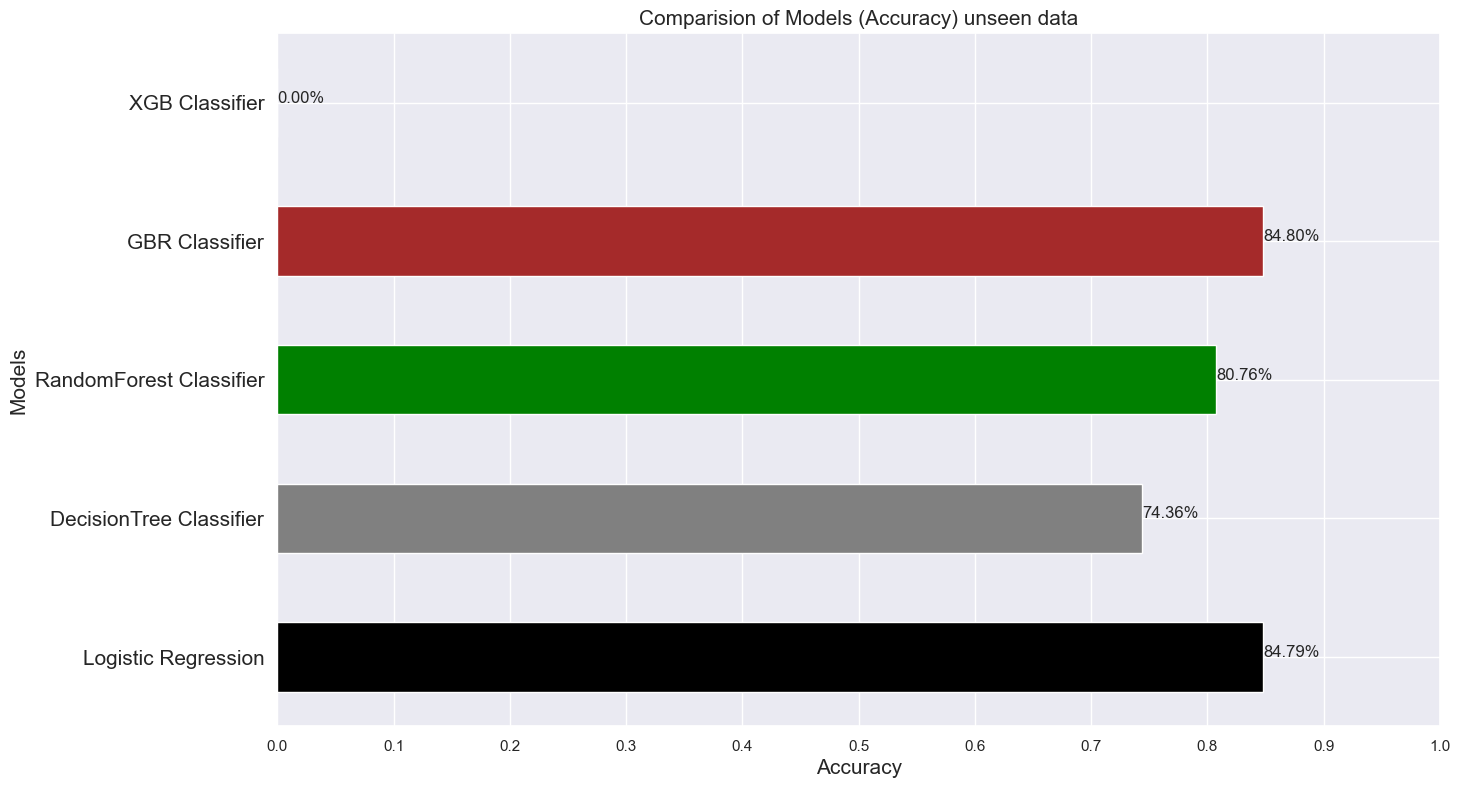

In [66]:
ax = scores.plot(kind = 'barh',figsize=(15,9),color=['black','gray','green','brown','pink','blue','red'])
ax.set_title('Comparision of Models (Accuracy) unseen data',fontsize=15)
ax.set_xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
ax.set_yticklabels(Model_Names,fontsize=15,)
ax.set_ylabel("Models",fontsize=15)
ax.set_xlabel("Accuracy",fontsize=15)
[ax.text(v, i, '{:.2f}%'.format(100*v)) for i, v in enumerate(scores)];
plt.show()

# 	Evaluation and further modelling improvements

### Hyper parameter Tuning for Highest performing Model (Logistic Regression)

In [67]:
# Create logistic regression object
lr = LogisticRegression()

# Set hyperparameters to tune
hyperparameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear']
}

###  Create GridSearchCV object and fit it on training data:

In [ ]:
# Create GridSearchCV object
clf = GridSearchCV(lr, hyperparameters, cv=5)

# Fit GridSearchCV object to training data
clf.fit(X_train_scaled, y_train)


### Print best hyperparameters and best score

In [ ]:
# Print best hyperparameters and best score
print('Best parameters:', clf.best_params_)
print('Best score:', clf.best_score_)
